In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
BATCH_SIZE=32
EPOCHS=50
LEARNING_RATE=0.001
CLASSES=10

In [5]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [0]:
y_train = tensorflow.keras.utils.to_categorical(y_train, CLASSES)
y_test = tensorflow.keras.utils.to_categorical(y_test, CLASSES)

In [8]:
model=Sequential([
      layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
      layers.AveragePooling2D(),
      layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
      layers.AveragePooling2D(),
      layers.Flatten(),
      layers.Dense(units=120, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)),
      layers.Dense(units=84, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1_l2(0.01)),
      #layers.Dropout(0.2),
      layers.Dense(units=10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 6)         168       
_________________________________________________________________
average_pooling2d_2 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [0]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255
)

val_datagen=ImageDataGenerator(
    rescale=1./255
)

train_datagen.fit(x_train)

val_datagen.fit(x_test)

train_generator=train_datagen.flow(x_train,y_train,batch_size=BATCH_SIZE)

val_generator=val_datagen.flow(x_test,y_test,batch_size=BATCH_SIZE)

In [11]:
history=model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=val_generator
)

Epoch 1/50
1563/1563 [==============================] - 10s 7ms/step - loss: 2.3695 - accuracy: 0.2706 - val_loss: 1.8146 - val_accuracy: 0.3690
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7248 - accuracy: 0.4005 - val_loss: 1.6189 - val_accuracy: 0.4418
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6214 - accuracy: 0.4449 - val_loss: 1.5743 - val_accuracy: 0.4634
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5759 - accuracy: 0.4619 - val_loss: 1.5346 - val_accuracy: 0.4747
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5372 - accuracy: 0.4792 - val_loss: 1.5386 - val_accuracy: 0.4779
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5094 - accuracy: 0.4890 - val_loss: 1.4959 - val_accuracy: 0.4898
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4806 - accuracy: 0.5005 - val_loss: 1.4535 - val_ac

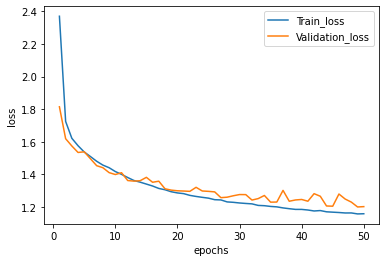

In [13]:
epochs=50
plt.plot([i for i in range(1,epochs+1)],history.history['loss'],label="Train_loss")
plt.plot([i for i in range(1,epochs+1)],history.history['val_loss'],label="Validation_loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

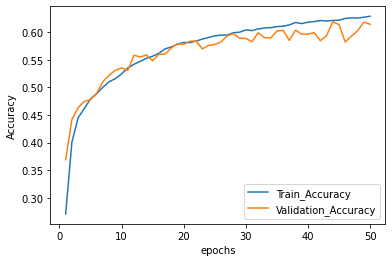

In [14]:
plt.plot([i for i in range(1,epochs+1)],history.history['accuracy'],label="Train_Accuracy")
plt.plot([i for i in range(1,epochs+1)],history.history['val_accuracy'],label="Validation_Accuracy")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
model.save('CIFAR10LeNet.h5')